# LE COUEDIC Thomas & PRUVOT DE NEUFVILLE Guillaume

# A TITANIC DATASET

## A.1 Preliminary analysis 

### 1 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import scipy.stats as sp
from IPython.display import display, Markdown, Latex
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.patches as mpatches
import sklearn
import pydotplus
import collections
from IPython.display import Image, display
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
train = pd.read_csv('titanic_train.csv', sep=',', header=0, index_col=['PassengerId'])
test = pd.read_csv('titanic_test.csv', sep=',', header=0, index_col=['PassengerId'])

Il y a deux fichiers distincts car l'un contient les données d'entrainement (train) et l'autre les données de validation (test), celles qui vont permettre d'évaluer les performances de notre modèle. Ces deux fichiers sont bien évidemment différents : d'une part par leur taille (le jeu d'entrainement étant plus grand) et également par leur contenu (en effet, lorsque l'on évaluera le modèle, on lui présentera des données qu'il n'a jamais vu, évidemment). En regroupant les deux jeux de données, on obtient le dataset complet.

In [3]:
train.head()

,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
299,1,1,Saalfeld,Mr. Adolphe,male,NaN,0,0,19988,30.5000,C106,S
300,1,1,Baxter,Mrs. James (Helene DeLaudeniere Chaput),female,50.0,0,1,PC 17558,247.5208,B58 B60,C
301,1,3,Kelly,Miss. Anna Katherine Annie Kate,female,NaN,0,0,9234,7.7500,NaN,Q
302,1,3,McCoy,Mr. Bernard,male,NaN,2,0,367226,23.2500,NaN,Q
303,0,3,Johnson,Mr. William Cahoone Jr,male,19.0,0,0,LINE,0.0000,NaN,S


In [4]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
FullName     object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Les différents attributs de ce jeu de donnés sont : 
- PassengerId: integer. Il représente l'identifiant du passager. Il est unique.
- Survived : integer. 1 si le passager a survécu. 0 sinon.
- Pclass : integer. Indique la classe dans laquelle a voyagé le passager (1, 2 ou 3).
- Name, FullName : string. Précise le nom et le nom complet du passager.
- Sex : string. Indique le sexe du passager (male ou female).
- Age : float. Indique l'age du passager.
- SibSp : integer. Indique le nombre de soeurs/frères et époux/épouses du passager présents à bord.
- Parch : integer. Indique le nombre de parents et enfants du passager présents à bord.
- Ticket : integer. Indique le numéro du ticket du passager.
- Fare : float. Indique le prix du billet.
- Cabin : string. Indique la référence de la cabine du passager
- 
Embarked : string. Indique le port d'embarcation (C : Cherbourg, Q : Queenstown ou S : Southampton)

In [5]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
FullName      0
Sex           0
Age         120
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       450
Embarked      1
dtype: int64

Grâce à cette commande, on s'aperçoit qu'il manque l'age de 120 passagers, ainsi que la référence de la cabine de 450 passagers . De plus, pour un passager, il manque l'endroit où il a embarqué.

### 2 

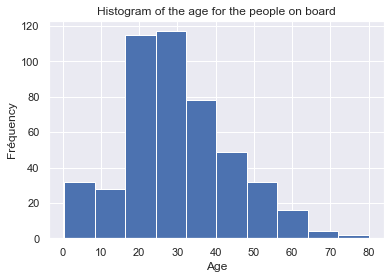

In [6]:
train['Age'].plot(kind='hist')
plt.xlabel("Age")
plt.ylabel("Fréquency")
plt.title("Histogram of the age for the people on board")
plt.show();

On ne tient pas compte explicitement dans le code des valeurs manquantes car, par défaut, la fonction `plot` ne prend pas en compte les valeurs manquantes. Les lignes du tableau où l'âge n'est pas précisé (NaN) sont donc supprimées et on ne traite que les lignes où l'âge est précisé.

In [7]:
survivors = train['Survived'].value_counts()
percentage_survivors = survivors[0]*100 / train['Survived'].count()
percentage_deaths = 100 - percentage_survivors
print("{}% des personnes ont survécu et {}% des personnes sont décédées." .format(percentage_survivors,percentage_deaths))

60.20236087689713% des personnes ont survécu et 39.79763912310287% des personnes sont décédées.


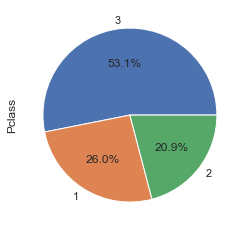

In [8]:
train['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%');

In [9]:
total_number_men = train[train["Sex"] == "male"].count()['Sex']
men_survivors = train[(train["Sex"] == "male") & (train['Survived'] == 1)].count()['Sex']
percentage_men_survivors = men_survivors * 100 / total_number_men

total_number_women = train[train["Sex"] == "female"].count()['Sex']
women_survivors = train[(train["Sex"] == "female") & (train['Survived'] == 1)].count()['Sex']
percentage_women_survivors = women_survivors * 100 / total_number_women

print("{}% des femmes ont survécu et {}% des hommes ont survécu".format(percentage_women_survivors,percentage_men_survivors))

75.96153846153847% des femmes ont survécu et 20.25974025974026% des hommes ont survécu


In [10]:
train_without_missing_values_age = train[pd.notnull(train['Age'])]

total_number_children = train_without_missing_values_age[train_without_missing_values_age["Age"] < 18].count()['Age']
children_survivors = train_without_missing_values_age[(train_without_missing_values_age["Age"] < 18) & (train_without_missing_values_age['Survived'] == 1)].count()['Age']
percentage_children_survivors = children_survivors * 100 / total_number_children

total_number_adults = train_without_missing_values_age[train_without_missing_values_age["Age"] >= 18].count()['Age']
adults_survivors = train_without_missing_values_age[(train_without_missing_values_age["Age"] >= 18) & (train_without_missing_values_age['Survived'] == 1)].count()['Age']
percentage_adults_survivors = adults_survivors * 100 / total_number_adults

print("{}% des enfants ont survécu et {}% des adultes ont survécu".format(percentage_children_survivors,percentage_adults_survivors))

57.971014492753625% des enfants ont survécu et 40.34653465346535% des adultes ont survécu


Nous avons décidé de supprimer les lignes où l'âge n'était pas précisé (où sa valeur valait 'NaN') pour ne pas biaiser les pourcentages. Néanmoins pandas gère automatiquement les valeurs manquantes de cette manière, comme indiqué précedemment.

Text(0.5, 1.0, 'Garçon')

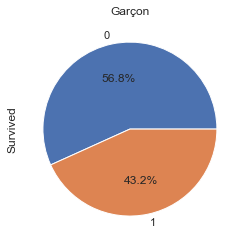

43.2% des garçons ont survécu


Text(0.5, 1.0, 'Fille')

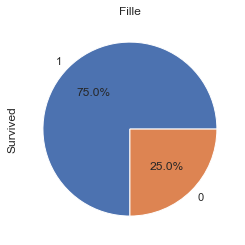

75% des filles ont survécu


Text(0.5, 1.0, 'Homme')

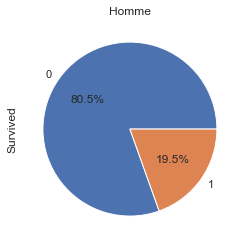

19.5% des hommes ont survécu


Text(0.5, 1.0, 'Femme')

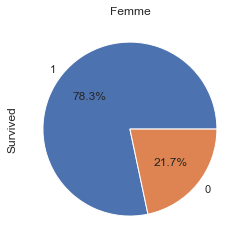

78.3% des femmes ont survécu


In [11]:
train[(train['Age'] < 18) & (train['Sex'] == 'male')]['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Garçon")
plt.show();
print('43.2% des garçons ont survécu')

train[(train['Age'] < 18) & (train['Sex'] == 'female')]['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Fille")
plt.show();
print('75% des filles ont survécu')

train[(train['Age'] >= 18) & (train['Sex'] == 'male')]['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Homme")
plt.show();
print('19.5% des hommes ont survécu')

train[(train['Age'] >= 18) & (train['Sex'] == 'female')]['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Femme")
plt.show();
print('78.3% des femmes ont survécu')

Text(0.5, 1.0, 'Classe 1')

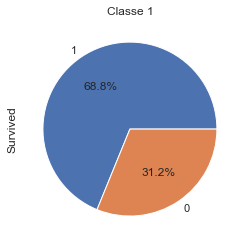

68.8% des passagers de la classe 1 ont survécu


Text(0.5, 1.0, 'Classe 2')

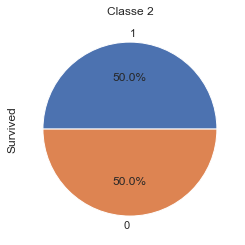

50% des passagers de la classe 2 ont survécu


Text(0.5, 1.0, 'Classe 3')

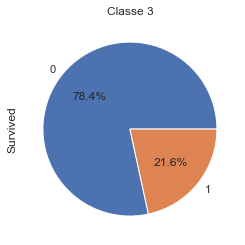

21.6% des passagers de la classe 3 ont survécu


In [12]:
train[(train['Pclass'] == 1)]['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Classe 1")
plt.show();
print('68.8% des passagers de la classe 1 ont survécu')

train[(train['Pclass'] == 2)]['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Classe 2")
plt.show();
print('50% des passagers de la classe 2 ont survécu')

train[(train['Pclass'] == 3)]['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Classe 3")
plt.show();
print('21.6% des passagers de la classe 3 ont survécu')

Il n'y a pas de valeurs manquantes concernant le numéro de la classe des passagers.

### 3

La politique a bien été respectée dans le sens où, effectivement, le pourcentage de filles sauvées, de garçons sauvés, et de femmes sauvées est deux supérieur ou plus au pourcentage d'hommes sauvées.
Néanmoins, on peut tout de même noter que les filles ont été sauvées en priorité par rapport aux garçons alors qu'ils font tous partie de la catégorie "enfants"; de plus les filles n'ont pas vraiment été sauvées en priorité par rapport aux femmes. Donc oui les hommes ont bien laissé leur place aux femmes et aux enfants, mais cependant, les personnes du sexe féminin ont été priorisés par rapport aux garçons et les filles n'ont pas été priorisées par rapport aux femmes.

### 4

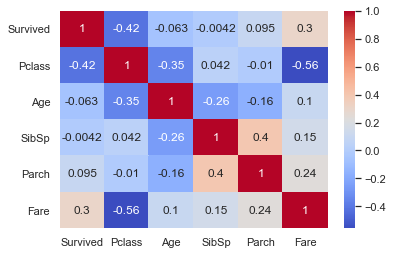

In [13]:
sns.heatmap(train.corr(), cmap='coolwarm', annot=True);

Pclass/Fare : -0.56. Corrélation négative relativement importante surement dûe au fait que les prix des billets évoluaient en fonction de la classe dans laquelle on voyageait mais également des prestations supplémentaires que l'on commandait (accès au bar, soins, ou autres), ce qui explique cette correlation étroite. Le moins vient du fait que la classe 3 était moins chère que la classe 1.

Parch/SibSp : 0.4. Corrélation positive assez forte du fait que certains voyageurs voyagaient surement avec leur famille.

Age/Pclass : -0.35 Corrélation négative assez forte pouvant être expliquée par le fait que les personnes âgées étaient celles qui avaient le plus de moyens du fait que la vie active était derrière eux et qu'ils pouvaient donc se payer une cabine plus luxueuse en classe 1.

SibSp/Age : -0.26. Corrélation négative moyenne du fait que les enfants étaient plus à même de voyager avec leurs frères et soeurs plutôt que les adultes et les personnes âgées qui étaient plus à même de voyager en couple.

Fare/Survived : 0.3. Corrélation positive moyenne témoignant du fait que les gens ayant voyagé dans les classes les plus luxueuses ont plus survécu que les autres.

### 5

In [14]:
def Fare2 (row):
    if row['Fare']  < 10 :
        return 1
    if row['Fare'] < 20 :
        return 2
    if row['Fare'] < 30 :
        return 3
    else:
        return 4
    
train['Fare2'] = train.apply (lambda row: Fare2(row), axis=1)
test['Fare2'] = test.apply (lambda row: Fare2(row), axis=1)

On utilise le coefficient de détermination pour évaluer la force du lien entre `Fare2` et `Pclass`.

$$r^2 = \left ( \frac{Cov(X,Y)}{S_{x}S_{y}} \right )^2$$

In [15]:
coeff_det = (train['Fare2'].corr(train['Pclass']) / (train['Fare2'].std() * train['Pclass'].std())) ** 2
print('Le coefficient de determination est {}.'.format(coeff_det))

Le coefficient de determination est 0.4992548024230503.


Le lien entre Fare2 et Pclass est relativement important. Effectivement il parait logique que le prix d'un billet devait être étroitement lié à la classe dans laquelle on voyageait. 

Text(0.5, 1.0, 'Fare2 = 1')

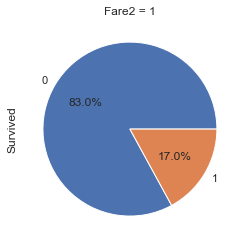

17% des personnes ayant payées leur billet moins de 10 ont survécu


Text(0.5, 1.0, 'Fare2 = 2')

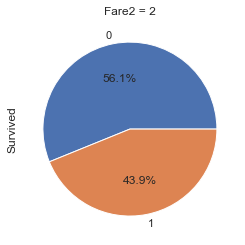

43.9% des personnes ayant payées leur billet moins de 20 ont survécu


Text(0.5, 1.0, 'Fare2 = 3')

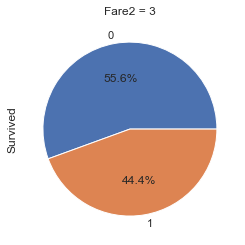

44.4% des personnes ayant payées leur billet moins de 30 ont survécu


Text(0.5, 1.0, 'Fare2 = 4')

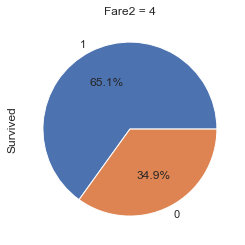

65.1% des personnes ayant payées leur billet plus de 30 ont survécu


In [16]:
train[train['Fare2'] == 1]['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Fare2 = 1")
plt.show();
print('17% des personnes ayant payées leur billet moins de 10 ont survécu')

train[train['Fare2'] == 2]['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Fare2 = 2")
plt.show();
print('43.9% des personnes ayant payées leur billet moins de 20 ont survécu')

train[train['Fare2'] == 3]['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Fare2 = 3")
plt.show();
print('44.4% des personnes ayant payées leur billet moins de 30 ont survécu')

train[train['Fare2'] == 4]['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Fare2 = 4")
plt.show();
print('65.1% des personnes ayant payées leur billet plus de 30 ont survécu')

Ainsi, on peut constater que plus les passagers payaient leur place chère, plus leurs chances de survie étaient élevées. On a vu que la corrélation entre le prix du voyage et la classe du passager était relativement importante. On peut donc dire que le prix du billet acheté par un passager a eu des conséquences non négligeables sur ses chances de survie.

Néanmoinns cela ne veut pas dire que les passagers dans les classes les plus prestigieuses ont été priorisés lors du sauvetage du Titanic et l'évacuation des passagers. Il se peut par exemple que la classe 1 ait été située dans une zone plus sécurisée du bateau tout simplement

## A.2 Naive Bayes Prediction

### 1

In [17]:
def Child(age):
    if age<18:
        return 1
    return 0
train['Child'] = train['Age'].apply(Child)
test['Child'] = test['Age'].apply(Child)
train['Age'].fillna(train['Age'].mean(),inplace=True)
test['Age'].fillna(train['Age'].mean(),inplace=True)

Nous choisissons ici est de remplacer les données manquantes par la valeur moyenne de la colonne Age.

### 2

In [19]:
map = { "female": 0, "male": 1}
train.replace(map, inplace=True)
test.replace(map, inplace=True)

gnbModel = GaussianNB()
gnbModel.fit(train[['Child','Sex']],train['Survived'])
expected = train['Survived']
predicted = gnbModel.predict(train[['Child','Sex']]) 
print(metrics.classification_report(expected,predicted,target_names=['mort','rescapé']))
expected = test['Survived']
predicted = gnbModel.predict(test[['Child','Sex']])
print(metrics.classification_report(expected,predicted,target_names=['mort','rescapé']))

GaussianNB(priors=None, var_smoothing=1e-09)

              precision    recall  f1-score   support

        mort       0.82      0.80      0.81       357
     rescapé       0.71      0.74      0.72       236

    accuracy                           0.78       593
   macro avg       0.77      0.77      0.77       593
weighted avg       0.78      0.78      0.78       593

              precision    recall  f1-score   support

        mort       0.86      0.77      0.81       192
     rescapé       0.65      0.77      0.70       106

    accuracy                           0.77       298
   macro avg       0.75      0.77      0.76       298
weighted avg       0.78      0.77      0.77       298



Expliquons les différentes métriques de classification_report : 
On s'assurera de poser d'abord les variables suivantes : 
                        - tp = true positives 
                        - fp = false positives
                        - tn = true négatives
                        - fn = false négatives
La precision correspond au ratio tp/(tp+fp), c'est à dire la capacité de l'algorithme à ne pas marquer une instance positive qui est finalement négative.
Recall correspond au ratio tp/(tp+fn), c'est à dire la capacité de l'algorithme à trouver toutes les valeurs positives.
F1-score correspond à la moyenne harmonique de la precision et du recall, telle que le meilleur score est 1.0 et le pire est 0.0 : 2precisionrecall/(precision +recall)
Support correspond au nombre d'occurrences de chaque classe dans "expected".
La fonction va retourner la précision, recall, F1-score, support moyenne avec une différents types de moyenne : 
            - macro average : moyenne des moyennes non pondérées par label.
            - weighted average : moyenne des moyennes pondérées par label.
            - micro average : moyenne du total de tp,fn et fp.
Cas du training set : On remarque que la précision, le recall et le f1-score sont plus élevés pour le label 'mort' que pour le label 'rescapé'. On en déduit que l'algorithme est plus efficace pour reconnaitre les morts que les vivants.
Cas du test : On remarque que la précision, le recall et le f1-score sont plus élevés pour le label 'mort' que pour le label 'rescapé'. En comparant entre le test et le training, on remarque que la précision a beaucoup baissé (de 0.71 à 0.65) pour les rescapés. L'algorithme aura plus tendance à se tromper lors du choix de la valeur 'rescapé'.
L'algorithme a plus de chance de se tromper sur le fait qu'une personne soit en vie, mais aussi du fait du recall assez faible, de classer une personne morte alors qu'elle est en vie.

### 3

In [21]:
gnbModel = GaussianNB()
gnbModel.fit(train[['Child','Sex','Fare2']],train['Survived'])
expected = train['Survived']
predicted = gnbModel.predict(train[['Child','Sex','Fare2']]) 
print(metrics.classification_report(expected,predicted,target_names=['mort','rescapé'])) 
expected = test['Survived']
predicted = gnbModel.predict(test[['Child','Sex','Fare2']])
print(metrics.classification_report(expected,predicted,target_names=['mort','rescapé']))

GaussianNB(priors=None, var_smoothing=1e-09)

              precision    recall  f1-score   support

        mort       0.82      0.80      0.81       357
     rescapé       0.71      0.74      0.72       236

    accuracy                           0.78       593
   macro avg       0.77      0.77      0.77       593
weighted avg       0.78      0.78      0.78       593

              precision    recall  f1-score   support

        mort       0.86      0.77      0.81       192
     rescapé       0.65      0.77      0.70       106

    accuracy                           0.77       298
   macro avg       0.75      0.77      0.76       298
weighted avg       0.78      0.77      0.77       298



En ajoutant l'attribut `Fare 2` les résultats de prédiction ne semblent pas être modifiées. La précision, le recall et la f-value restent identiques.

## A.3 Decision tree Prediction

81.20805369127517
['Sex', 'SibSp', 'Parch', 'Child']


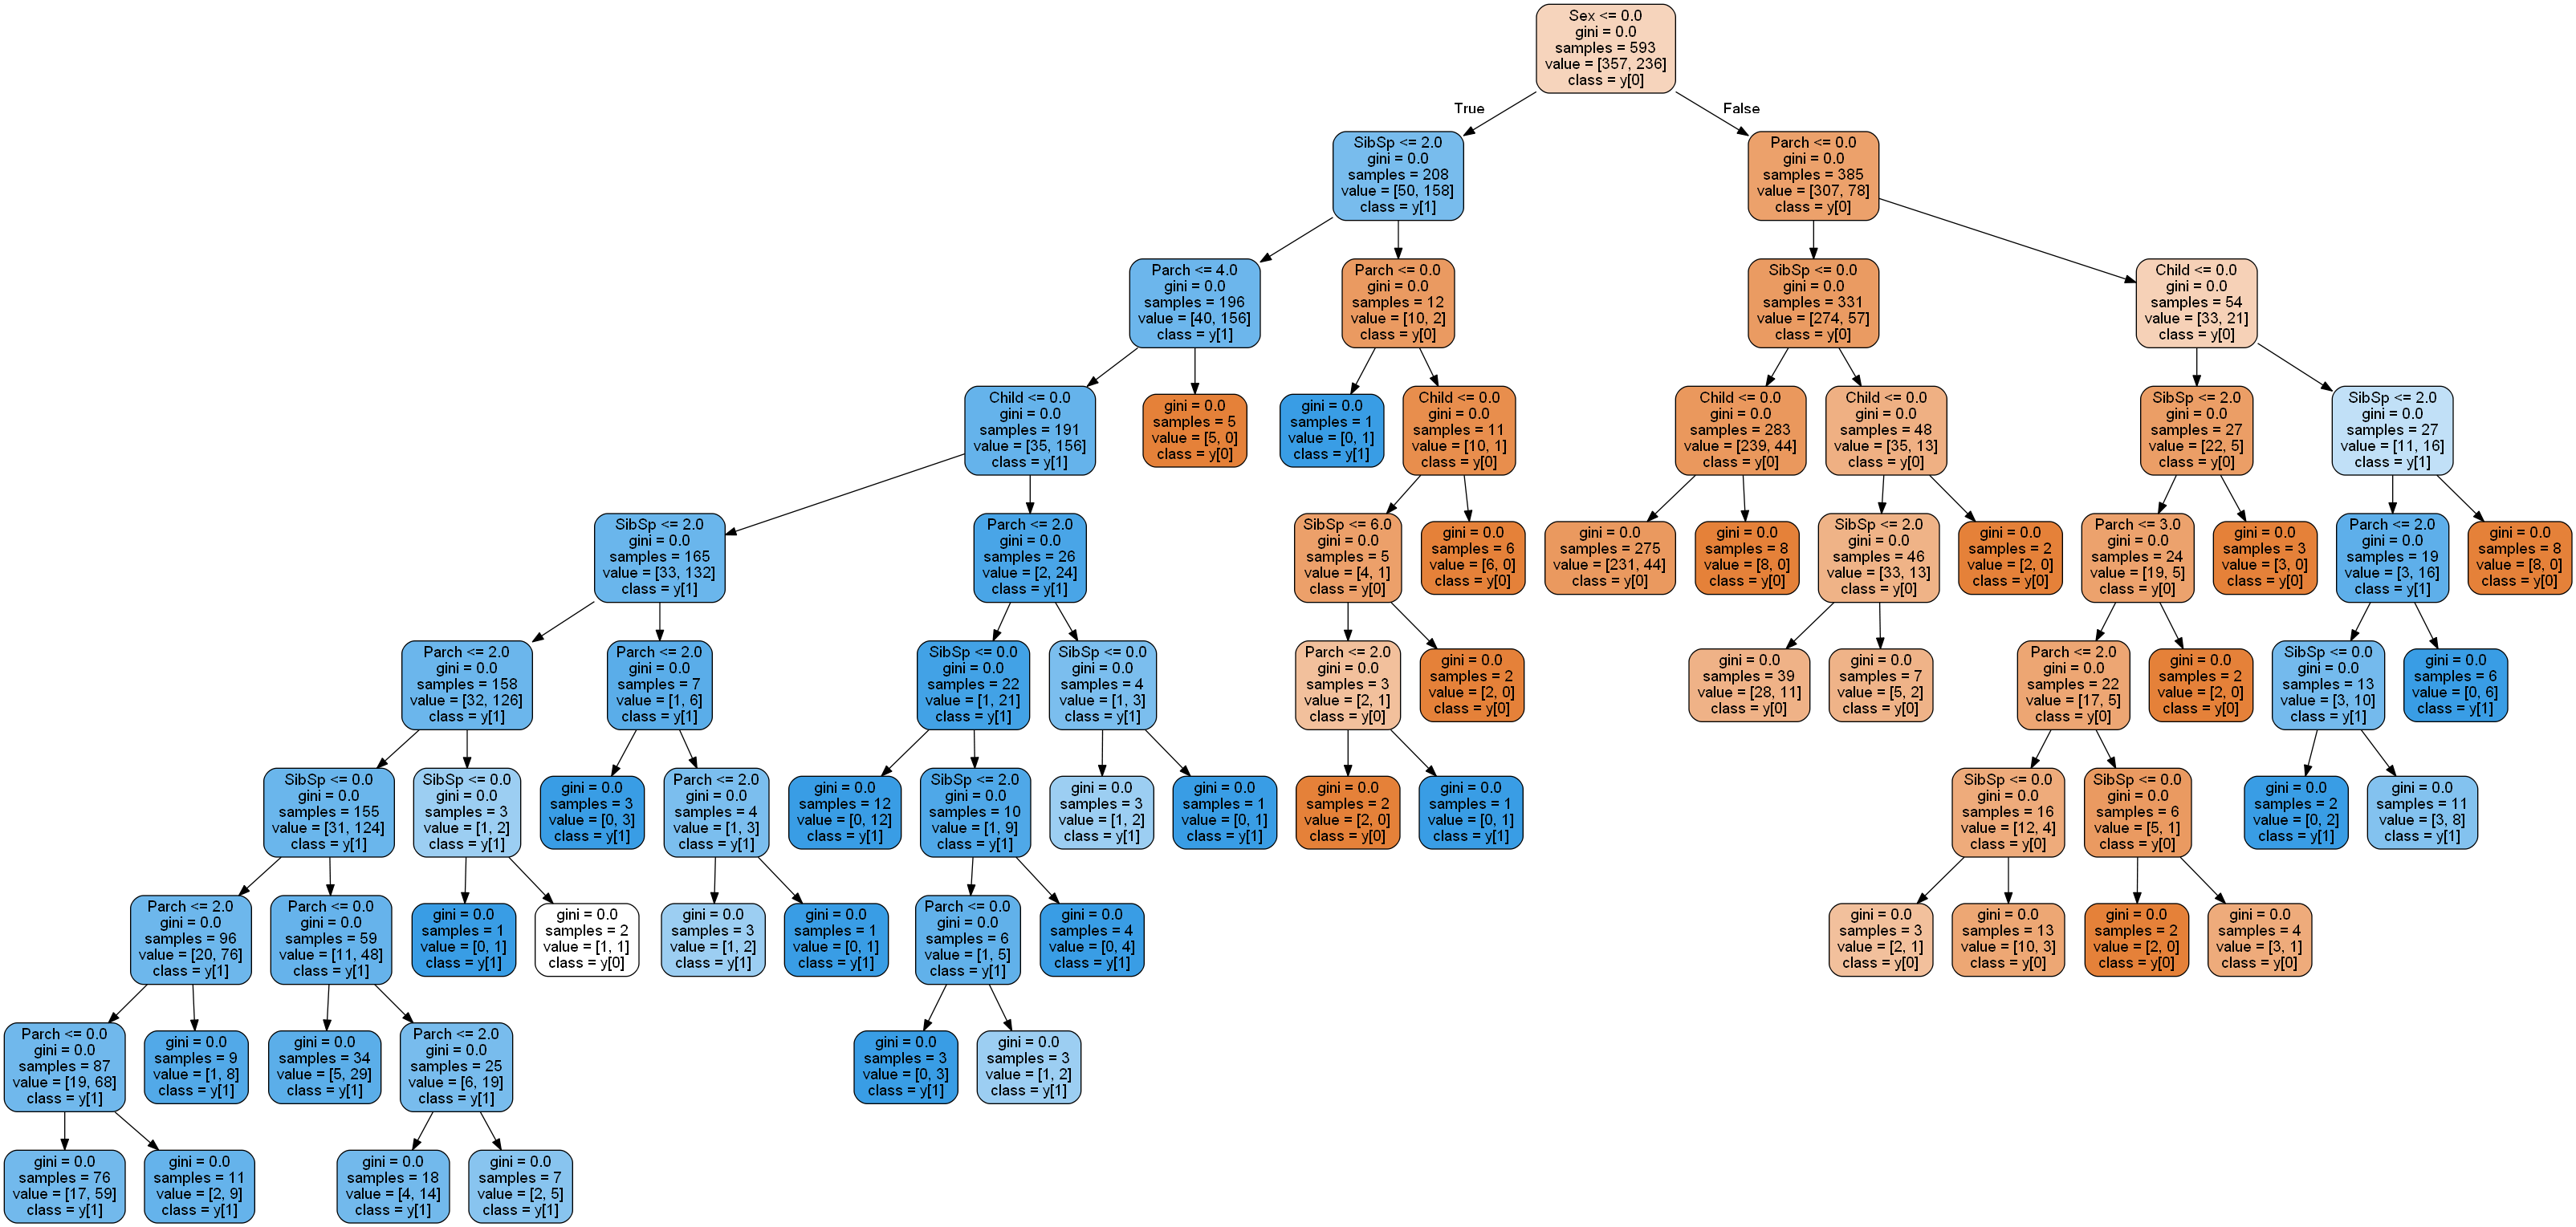

In [124]:
map = { "female": 0, "male": 1}
train.replace(map, inplace=True)
test.replace(map, inplace=True)


train = train[pd.notnull(train['Age'])]
test = test[pd.notnull(test['Age'])]

def treeClassifier(var, show_tree = False):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(train[var] , train['Survived'])
    
    if(show_tree == True):
        dot_data_ = tree.export_graphviz(clf, out_file=None, feature_names = var, class_names=True, filled=True, rounded=True, precision=0)
        graph = pydotplus.graph_from_dot_data(dot_data_)
        display(Image(graph.create_png()))
    
    result = clf.predict(test[var])
    accuracy = accuracy_score(test['Survived'], result) * 100
    return accuracy;

x = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Fare2', 'Child']
combinaisons = []
for i in range(len(x)):
    combinaisons.extend(combinations(x, i + 1))

best_combinaison = []
best_precision = 0

for comb in combinaisons:
    var = list(comb)
    precision = treeClassifier(var)
    if(precision > best_precision):
        best_precision = precision
        best_combinaison = var
    
print(best_precision)
print(best_combinaison)
treeClassifier(best_combinaison, True);

Dans cette étape, on commence par modifier la catégorie 'Sex' en assignant la valeur 0 aux femmes et la valeur 1 aux hommes.

Nous éliminons ensuite les lignes où la valeur de l'âge est égale à NaN. 

Nous créons ensuite une fonction permettant d'entrainer un arbre de décision et calculer sa précision sur le jeu de test.
Enfin nous entrainons autant d'arbres de décision qu'il y a de combinaisons possibles parmis ces variables : Pclass, Sex, Age, SibSp, Parch, Fare, Fare2 et nous retournons l'arbre ayant la meilleure précision ainsi que les variables qui ont été utilisées.

Dans ce cas, l'arbre de décision le plus performant a atteint une précision de quasiment 80% et a pris en compte les variables Pclass, Sex, Age, Parch et Fare2. Ceci n'est pas surprenant car au cours de ce LAB, nous avons vu que ce sont bien ces variables qui jouaient un rôle important dans la survie d'un passager (mis à part Parch peut-être...). Néanmoins si on relance le notebbok, peut être que ce sera un autre arbre de décision prenant en compte d'autre variables qui aura la meilleure précision.